In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import sys
import os
import xarray as xr
import math
import numpy as np
import matplotlib.pyplot as plt

In [107]:
sys.path.append('/home/cucchi/phd/devel/phd/')
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_1.0_0/'
obs = 'energy_bin_0.8q_0.9q'
forcing = 'SF_8_0.5_0'

In [98]:
from lab import analysis
from lab.simulation import forcings

Average response

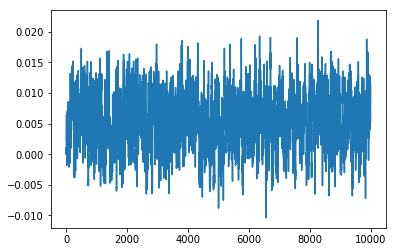

In [99]:
response_p1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_{}_SF_8_1.0_0.nc'.format(obs)))
response_p1 = response_p1.values
response_p1 = np.squeeze(response_p1)
plt.plot(response_p1)

In [108]:
response_p1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_{}_SF_8_1.0_0.nc'.format(obs)))
response_p1

<xarray.DataArray 'var' (time_step: 10000, node: 1)>
array([[0.    ],
       [0.001 ],
       [0.0006],
       ...,
       [0.0093],
       [0.0074],
       [0.0053]], dtype=float32)
Coordinates:
  * node       (node) int32 0
  * time_step  (time_step) int32 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999
Attributes:
    forcing:     SF_8_1.0_0
    observable:  energy_bin_0.8q_0.9q
    ensemble:    10000

Susceptibility

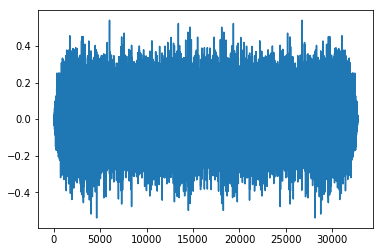

In [100]:
chi = analysis.compute_susceptibility(response_p1)
plt.plot(chi)

Predicted Response

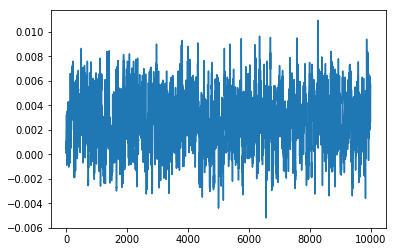

In [101]:
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=0.5))
plt.plot(resp_pred[0:10000])

Real Response

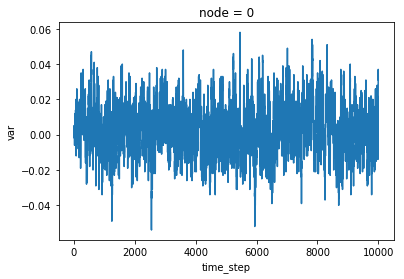

In [102]:
resp_real = xr.open_dataarray('/home/cucchi/phd/data/response/lorenz96/rk4/{f}/response_lorenz96_rk4_{o}_{f}.nc'.format(
    o=obs,
    f=forcing
))
resp_real.plot()

### Average

In [103]:
std_pred = resp_pred[0:10000].std()
sig_digit_pred = -math.floor(math.log10(std_pred))
print('predicted: {} +/- {}'.format(
    round(resp_pred[0:10000].mean(), sig_digit_pred), 
    round(resp_pred[0:10000].std(),sig_digit_pred)
))
std_real = resp_real.std().values
sig_digit_real = -math.floor(math.log10(std_real))
print('real:      {} +/- {}'.format(
    round(float(resp_real.mean().values), sig_digit_real), 
    round(float(resp_real.std().values), sig_digit_real)
))

predicted: 0.003 +/- 0.002
real:      0.0 +/- 0.01


## Semi-Difference

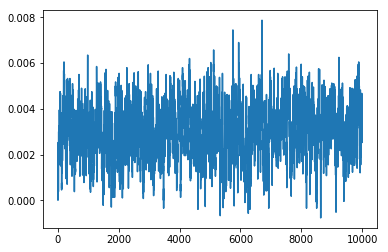

In [104]:
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/SF_8_-1.0_0/'
response_m1 = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_{}_SF_8_-1.0_0.nc'.format(obs)))
response_m1 = response_m1.values
response_m1 = np.squeeze(response_m1)
response = (response_p1 - response_m1)/2
chi = analysis.compute_susceptibility(response)
resp_pred = analysis.compute_response(chi, forcings.StepForcing(force_intensity_delta=0.5))
plt.plot(resp_pred[0:10000])

### Average

In [105]:
std_pred = resp_pred[0:10000].std()
sig_digit_pred = -math.floor(math.log10(std_pred))
print('predicted: {} +/- {}'.format(
    round(resp_pred[0:10000].mean(), sig_digit_pred), 
    round(resp_pred[0:10000].std(),sig_digit_pred)
))
std_real = resp_real.std().values
sig_digit_real = -math.floor(math.log10(std_real))
print('real:      {} +/- {}'.format(
    round(float(resp_real.mean().values), sig_digit_real), 
    round(float(resp_real.std().values), sig_digit_real)
))

predicted: 0.003 +/- 0.001
real:      0.0 +/- 0.01
